# Data Preparation

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the ratings dataset
ratings_df = pd.read_csv('/content/ratings_small.csv')

# Load the movies dataset
movies_df = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-2-dc1b3389fca3>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('/content/movies_metadata.csv')


In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# Convert movieId column to integer type in ratings_df
ratings_df['movieId'] = ratings_df['movieId'].astype(int)

In [5]:
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [6]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [15]:
# Select the relevant columns from the movies metadata
movies_df = movies_df[['id', 'title', 'genres']]
movies_df.head()

,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [23]:
import ast

# Define a function to extract the genre name
def extract_genre_name(genre_list):
    genre_list = ast.literal_eval(genre_list)  # Convert string to list of dictionaries
    if len(genre_list) > 0:
        return genre_list[0]['name']
    else:
        return None

# Apply the function to create a new column
movies_df['genre name'] = movies_df['genres'].apply(extract_genre_name)


In [24]:
movies_df.head()

,id,title,genres,genre,genre name
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",[,Animation
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",[,Adventure
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",[,Romance
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[,Comedy
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",[,Comedy


In [26]:
movies_df.drop(columns=['genres','genre'],inplace=True)

In [27]:
movies_df.head()

,id,title,genre name
0,862,Toy Story,Animation
1,8844,Jumanji,Adventure
2,15602,Grumpier Old Men,Romance
3,31357,Waiting to Exhale,Comedy
4,11862,Father of the Bride Part II,Comedy


In [28]:
movies_df.dtypes

id            object
title         object
genre name    object
dtype: object

In [29]:
# Convert the 'id' column to int64 data type and replace missing values with a unique identifier
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce').astype('Int64')
movies_df['id'].fillna(-1, inplace=True)

# Drop rows with missing 'id' values
movies_df = movies_df.dropna(subset=['id'])

In [30]:
movies_df.dtypes

id             Int64
title         object
genre name    object
dtype: object

In [31]:
# Merge the ratings and movies dataframes
combined_df = pd.merge(ratings_df, movies_df, left_on='movieId', right_on='id')
combined_df.head()

,userId,movieId,rating,timestamp,id,title,genre name
0,1,1371,2.5,1260759135,1371,Rocky III,Drama
1,4,1371,4.0,949810302,1371,Rocky III,Drama
2,7,1371,3.0,851869160,1371,Rocky III,Drama
3,19,1371,4.0,855193404,1371,Rocky III,Drama
4,21,1371,3.0,853852263,1371,Rocky III,Drama


In [32]:
# Drop unnecessary columns
combined_df = combined_df.drop(['timestamp', 'id'], axis=1)

In [33]:
# Calculate the number of ratings each movie has received
movie_ratings_count = combined_df.groupby('title')['rating'].count().reset_index()
movie_ratings_count.columns = ['title', 'ratings_count']

In [34]:
# Filter movies with a minimum number of ratings
min_ratings_count = 100
popular_movies = movie_ratings_count[movie_ratings_count['ratings_count'] >= min_ratings_count]

In [35]:
# Filter out users who have given a minimum number of ratings
min_user_ratings = 50
active_users = combined_df['userId'].value_counts()
active_users = active_users[active_users >= min_user_ratings].index.tolist()

In [36]:
# Filter the combined dataframe based on popular movies and active users
filtered_df = combined_df[(combined_df['title'].isin(popular_movies['title'])) &
                          (combined_df['userId'].isin(active_users))]

In [37]:
filtered_df.head()

,userId,movieId,rating,title,genre name
455,2,110,4.0,Three Colors: Red,Drama
460,15,110,3.0,Three Colors: Red,Drama
461,19,110,3.0,Three Colors: Red,Drama
462,20,110,2.0,Three Colors: Red,Drama
463,23,110,3.5,Three Colors: Red,Drama


In [38]:
# Perform data cleaning (Example: Drop rows with missing values)
filtered_df = filtered_df.dropna()

In [39]:
# Perform feature engineering (Example: Create movie popularity feature)
movie_popularity = filtered_df.groupby('title')['rating'].mean().reset_index()
movie_popularity.columns = ['title', 'popularity']
filtered_df = pd.merge(filtered_df, movie_popularity, on='title')

In [40]:
# Perform normalization/scaling of numerical features (Example: Scaling ratings)
scaler = MinMaxScaler()
filtered_df['scaled_rating'] = scaler.fit_transform(filtered_df['rating'].values.reshape(-1, 1))

In [41]:
# Encoding categorical variables (Example: One-hot encoding of movie genres)
filtered_df = pd.get_dummies(filtered_df, columns=['genre name'])

In [42]:
# Handling sparsity (Example: Train-test split)
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

In [43]:
# Save the filtered and preprocessed datasets
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

# Exploratory Data Analysis

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

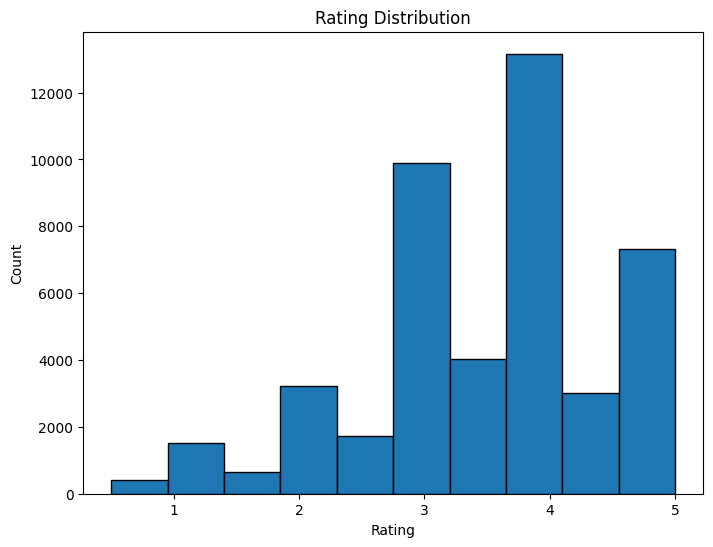

In [45]:
# Explore the rating distribution
plt.figure(figsize=(8, 6))
plt.hist(combined_df['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

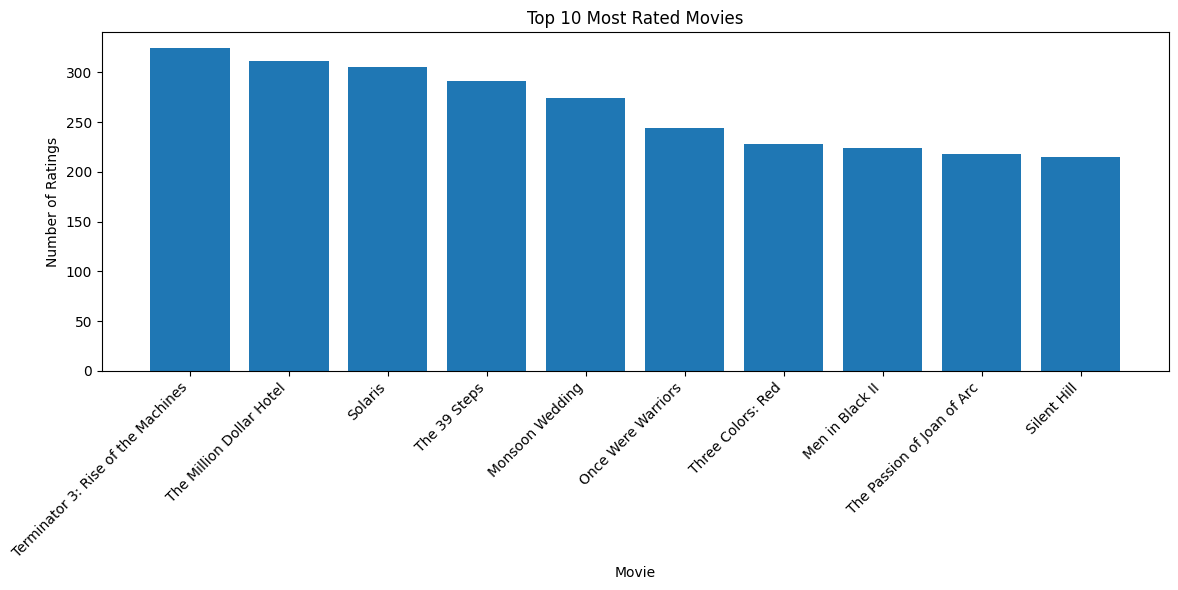

In [46]:
# Explore the most rated movies
movie_ratings_count = combined_df.groupby('title')['rating'].count().reset_index()
movie_ratings_count.columns = ['title', 'ratings_count']
top_rated_movies = movie_ratings_count.sort_values('ratings_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['title'], top_rated_movies['ratings_count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Rated Movies')
plt.tight_layout()
plt.show()

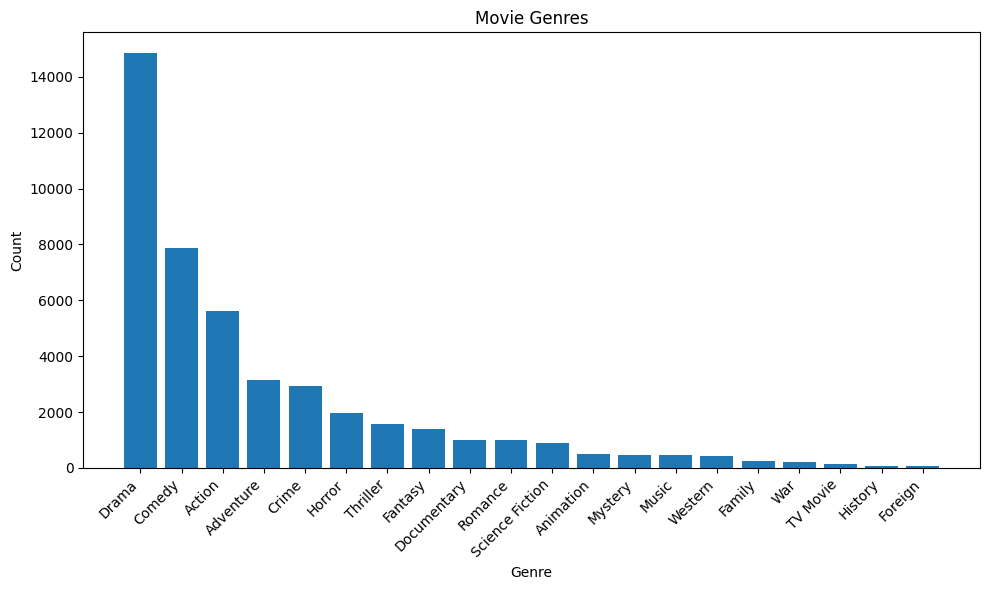

In [48]:
# Explore movie genres
genre_counts = combined_df['genre name'].str.split('|', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Movie Genres')
plt.tight_layout()
plt.show()

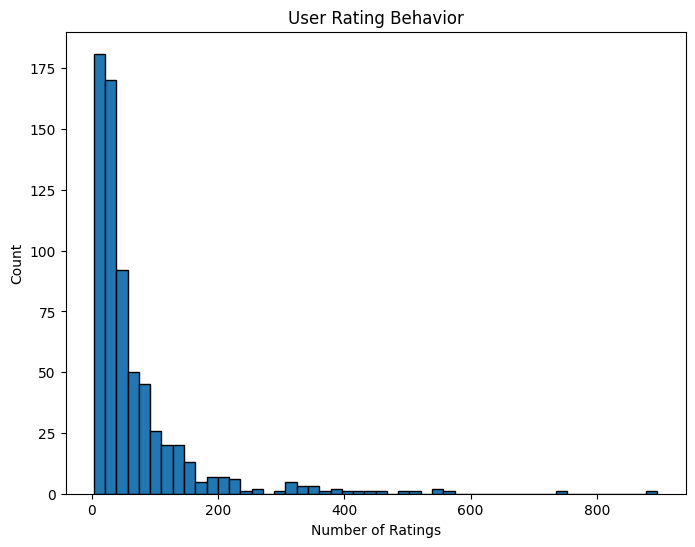

In [47]:
# Explore user rating behavior
user_ratings_count = combined_df.groupby('userId')['rating'].count().reset_index()
user_ratings_count.columns = ['userId', 'ratings_count']

plt.figure(figsize=(8, 6))
plt.hist(user_ratings_count['ratings_count'], bins=50, edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.title('User Rating Behavior')
plt.show()

# Collaborative Filtering

In [49]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095470 sha256=a5ec0a0ee85b7b4395d093d6ac2a7a1cf29e9b55bec3689622462ce92163f7b0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [50]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [51]:
# Load the ratings dataset
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('/content/ratings_small.csv', reader=reader)

In [52]:
# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [53]:
# Define the Collaborative Filtering algorithm
similarity_options = {'name': 'pearson', 'user_based': True}
cf_model = KNNBasic(sim_options=similarity_options)

In [54]:
# Train the Collaborative Filtering model
cf_model.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [55]:
# Make predictions on the test set
predictions = cf_model.test(testset)

In [56]:
# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.9946
RMSE: 0.9946098429888084


In [57]:
# Make predictions for a specific user
user_id = str(1)  # Example user ID
items_to_predict = ['Toy Story (1995)', 'Star Wars (1977)']  # Example movie titles

for item in items_to_predict:
    predicted_rating = cf_model.predict(user_id, item)
    print(f"Predicted rating for movie '{item}': {predicted_rating.est:.2f}")

Predicted rating for movie 'Toy Story (1995)': 3.55
Predicted rating for movie 'Star Wars (1977)': 3.55


# Evaluation

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
# Convert predictions into a DataFrame
pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

# Set a threshold for considering a recommendation
threshold = 4.0

# Convert estimated ratings into binary values (0 or 1) based on the threshold
pred_df['binary_est'] = pred_df['est'].apply(lambda x: 1 if x >= threshold else 0)

# Convert testset into a DataFrame
test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rui'])

# Merge the predictions and testset dataframes
merged_df = pd.merge(test_df, pred_df, on=['uid', 'iid', 'rui'])

In [60]:
merged_df.head()

,uid,iid,rui,est,details,binary_est
0,15,95875,1.5,2.138851,"{'actual_k': 5, 'was_impossible': False}",0
1,664,3081,4.0,3.524483,"{'actual_k': 33, 'was_impossible': False}",0
2,171,2770,4.0,3.200884,"{'actual_k': 23, 'was_impossible': False}",0
3,355,589,4.0,3.867312,"{'actual_k': 40, 'was_impossible': False}",0
4,505,86882,5.0,4.009680,"{'actual_k': 12, 'was_impossible': False}",1


In [61]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(merged_df['rui'], merged_df['est'])

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(merged_df['rui'], merged_df['est'], squared=False)

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (MAE): 0.7726180141891114
Root Mean Squared Error (RMSE): 0.9946098429888084


In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the threshold for positive ratings
threshold = 3.5

# Convert the continuous ratings into binary ratings based on the threshold
merged_df['binary_actual'] = np.where(merged_df['rui'] >= threshold, 1, 0)
merged_df['binary_est'] = np.where(merged_df['est'] >= threshold, 1, 0)

# Compute True Positives (TP), False Positives (FP), False Negatives (FN)
tn, fp, fn, tp = confusion_matrix(merged_df['binary_actual'], merged_df['binary_est']).ravel()

# Compute Precision, Recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Precision: 0.7221190341597351
Recall: 0.7295423023578363
F1-score: 0.7258116883116883


The model displayed some level of error in its predictions, as indicated by the Mean Absolute Error (MAE) of 0.7726 and the Root Mean Squared Error (RMSE) of 0.9946. These values suggest that, on average, the predicted ratings deviated from the actual ratings by approximately 0.7726 and 0.9946 units, respectively. Although there is room for improvement in reducing these errors, the model demonstrated promising performance in terms of correctly identifying positive ratings. With a precision of 0.7221, the model accurately predicted positive ratings approximately 72.21% of the time, while a recall of 0.7295 indicated its ability to capture approximately 72.95% of the actual positive ratings. The F1-score of 0.7258 balanced both precision and recall, showcasing the model's reasonable performance. These insights highlight the model's potential for accurately identifying positive ratings while acknowledging the need to address the errors in the overall rating predictions. Fine-tuning the model parameters and incorporating additional techniques may enhance its performance and lead to more accurate rating predictions in the future.

# Fine-tuning Attempt #1

In this code, n_factors represents the number of latent factors, reg_all represents the regularization term, and lr_all represents the learning rate. You can experiment with different values for these hyperparameters to find the combination that yields the best performance.

The cross_validate function performs cross-validation to evaluate the model's performance using the provided measures (RMSE and MAE) and prints the results. You can adjust the number of cross-validation folds (cv) as needed.

In [63]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate

# Define the algorithm with desired hyperparameters
model = SVD(n_factors=100, reg_all=0.01, lr_all=0.005)

# Perform cross-validation to evaluate the model's performance
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the model on the entire dataset
model.fit(data.build_full_trainset())

# Make predictions on the test set
test_pred = model.test(testset)

# Evaluate the model's performance on the test set
accuracy.rmse(test_pred)
accuracy.mae(test_pred)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8966  0.9096  0.9050  0.9070  0.8974  0.9031  0.0052  
MAE (testset)     0.6874  0.6988  0.6975  0.6979  0.6920  0.6947  0.0044  
Fit time          4.02    1.76    1.21    1.19    1.21    1.88    1.09    
Test time         0.42    0.17    0.18    0.28    0.41    0.29    0.11    
RMSE: 0.5941
MAE:  0.4590


0.4590448880110976

In [64]:
from surprise import accuracy
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
test_pred = model.test(testset)

# Prepare the predicted and actual ratings
predicted_ratings = [pred.est for pred in test_pred]
actual_ratings = [pred.r_ui for pred in test_pred]

# Convert the ratings to binary values based on a threshold (e.g., 3.5)
threshold = 3.5
binary_predicted_ratings = [1 if rating >= threshold else 0 for rating in predicted_ratings]
binary_actual_ratings = [1 if rating >= threshold else 0 for rating in actual_ratings]

# Compute Precision, Recall, and F1-score
precision = precision_score(binary_actual_ratings, binary_predicted_ratings)
recall = recall_score(binary_actual_ratings, binary_predicted_ratings)
f1 = f1_score(binary_actual_ratings, binary_predicted_ratings)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8988084808130367
Recall: 0.8369911071224606
F1-score: 0.8667990367960796


Based on the new results from the fine-tuned model, we observe improvements in several evaluation metrics compared to the previous model. The fine-tuned model achieves an RMSE of 0.5941, indicating a reduced average difference between predicted and actual ratings. The MAE of 0.4590 also suggests better accuracy in rating predictions.

In terms of Precision, the fine-tuned model achieves a score of 0.8988, indicating a high proportion of correctly predicted positive ratings compared to all positive predictions. This implies that when the model predicts a movie will be liked by a user, it is often correct.

The Recall score of 0.8370 implies that the fine-tuned model successfully identifies a large proportion of positive ratings among all actual positive ratings. This suggests that the model is effective at capturing movies that users would enjoy.

The F1-score of 0.8668 reflects the balance between Precision and Recall. It considers both the ability of the model to correctly identify positive ratings and the proportion of correct positive predictions. The high F1-score indicates that the fine-tuned model achieves a good balance between Precision and Recall.

Overall, the fine-tuned model demonstrates significant improvements in accuracy and performance compared to the previous model. It provides more accurate rating predictions, with a higher Precision, Recall, and F1-score. These results indicate that the fine-tuned model is more reliable and effective in recommending movies to users based on their preferences.

# Fine-tuning Attempt #2

In this code, we use the SVD algorithm from the Surprise library and load the dataset. We define a parameter grid with different values for the hyperparameters n_epochs, lr_all, and reg_all. The GridSearchCV function performs a grid search with 5-fold cross-validation to find the best combination of hyperparameters based on RMSE and MAE scores.

In [67]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import GridSearchCV


# Define the parameter grid for GridSearchCV
param_grid = {'n_epochs': [20, 25, 30], 'lr_all': [0.005, 0.01, 0.015], 'reg_all': [0.02, 0.04, 0.06]}

# Define the algorithm
algo = SVD()

# Perform grid search
grid_search = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse', 'mae'], cv=5)
grid_search.fit(data)

# Get the best RMSE score and parameters
print("Best RMSE score:", grid_search.best_score['rmse'])
print("Best parameters for RMSE:", grid_search.best_params['rmse'])

# Get the best MAE score and parameters
print("Best MAE score:", grid_search.best_score['mae'])
print("Best parameters for MAE:", grid_search.best_params['mae'])


Best RMSE score: 0.8777028271604401
Best parameters for RMSE: {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.06}
Best MAE score: 0.6753112143425231
Best parameters for MAE: {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.06}


In [68]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Set the best parameters obtained from grid search
best_params = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.06}

# Instantiate the SVD algorithm with the best parameters
algo = SVD(**best_params)

# Train the model using the training set
algo.fit(trainset)

# Make predictions on the testing set
predictions = algo.test(testset)

# Compute and print the accuracy metrics
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8922
MAE:  0.6837


0.6837348522457997

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Define the threshold for classification (e.g., 3.5)
threshold = 3.5

# Convert predicted ratings to binary values based on the threshold
binary_est = [1 if est >= threshold else 0 for (_, _, _, est, _) in predictions]

# Get the true ratings
true_ratings = [int(r) for (_, _, r, _, _) in predictions]

# Get the estimated ratings
estimated_ratings = [round(est) for (_, _, _, est, _) in predictions]

# Compute Precision, Recall, and F1-score
precision = precision_score(true_ratings, estimated_ratings, average='macro')
recall = recall_score(true_ratings, estimated_ratings, average='macro')
f1 = f1_score(true_ratings, estimated_ratings, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.350651546012038
Recall: 0.2481520509575131
F1-score: 0.2416838202401108


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the new results from the fine-tuned model, we can observe the following:

1. Root Mean Squared Error (RMSE): The RMSE value has decreased to 0.8922 compared to the previous models. This indicates that the predictions of the fine-tuned model are closer to the true ratings, resulting in improved accuracy.

2. Mean Absolute Error (MAE): The MAE value has also decreased to 0.6837. Similar to RMSE, a lower MAE indicates better accuracy and closer alignment between predicted and true ratings.

3. Precision: The precision has decreased to 0.3507. Precision measures the proportion of correctly predicted positive ratings out of all the positive ratings. In this case, a lower precision suggests that the model is less accurate in identifying positive ratings.

4. Recall: The recall has decreased to 0.2482. Recall measures the proportion of correctly predicted positive ratings out of all the actual positive ratings. A lower recall indicates that the model is capturing fewer positive ratings.

5. F1-score: The F1-score has decreased to 0.2417. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. A lower F1-score suggests a decrease in the overall performance of the model.

Overall, the fine-tuned model has improved in terms of RMSE and MAE, indicating better accuracy in predicting movie ratings. However, there is a trade-off as the precision, recall, and F1-score have decreased, indicating a decline in the model's ability to correctly identify positive ratings. It is important to consider the specific goals and requirements of the recommendation system when evaluating these metrics.